## Step 1: Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve , classification_report, auc, precision_recall_curve, RocCurveDisplay
from wordcloud import WordCloud
import nltk
nltk.download()
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import plotly.express as px
import string
import warnings
warnings.filterwarnings('ignore')

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


## Step 2: Load the dataset

In [2]:
data = pd.read_csv('WELFake_Dataset.csv') # 0=fake, 1=real

In [3]:
data.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [4]:
data.tail()

,Unnamed: 0,title,text,label
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0
72133,72133,Goldman Sachs Endorses Hillary Clinton For Pre...,Goldman Sachs Endorses Hillary Clinton For Pre...,1


In [5]:
data.shape

(72134, 4)

In [6]:
data['text'][0]

'No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to  turn the tide  and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called  Sunshine.  She has a radio blog show hosted from Texas called,  Sunshine s F***ing Opinion Radio Show. A snapshot of her #FYF911 @LOLatWhiteFear Twitter page at 9:53 p.m. shows that she was urging supporters to  Call now!! #fyf911 tonight we continue to dismantle the illusion of white Below is a SNAPSHOT Twitter Radio Call Invite   #FYF911The radio show aired at 10:00 p.m. eastern standard time.During the show, callers clearly call for  lynching  and  killing  of white people.A 2:39 minute clip from the radio show can be heard here. It was provided to Breitbart Texas by someone who would like to be referred to

In [60]:
data['text'][3]

'dozen politically active pastor came private dinner Friday night hear conversion story unique context presidential politics Louisiana Gov Bobby Jindal traveled Hinduism Protestant Christianity ultimately became call “evangelical Catholic” two hour Jindal 42 recalled talking girl high school wanted “save soul” reading Bible closet parent would see feeling stir watching movie senior year depicted Jesus cross “I struck struck hard” Jindal told pastor “This Son God died sins” Jindal’s session Christian clergy lead congregation early presidential battleground state Iowa South Carolina part behindthescenes effort Louisiana governor find political base could help propel top tier Republican candidate seeking run White House 2016 Known GOP circle mostly mastery policy issue health care Jindal Rhodes Scholar graduate Ivy League’s Brown University obvious pool activist supporter help drive excitement outside home state harnessing religious experience way begun appeal part GOP’s influential core 

In [7]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71576 non-null  object
 1   text    72095 non-null  object
 2   label   72134 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [9]:
data.isnull().sum()

title    558
text      39
label      0
dtype: int64

In [10]:
data[data['title'].isnull()].index.tolist()

[1,
 43,
 162,
 185,
 269,
 318,
 358,
 639,
 686,
 884,
 912,
 1008,
 1269,
 1315,
 1321,
 1502,
 1511,
 1539,
 1623,
 1893,
 2199,
 2551,
 2646,
 3242,
 3726,
 3738,
 3995,
 4064,
 4167,
 4262,
 4297,
 4982,
 5191,
 5531,
 5654,
 5798,
 5817,
 5911,
 5954,
 6010,
 6054,
 6116,
 6135,
 6294,
 6634,
 6705,
 6723,
 6839,
 6916,
 7042,
 7081,
 7371,
 7561,
 7727,
 7744,
 8042,
 8105,
 8356,
 8574,
 9244,
 9494,
 9564,
 9644,
 9695,
 9770,
 10366,
 10633,
 10817,
 10939,
 11044,
 11064,
 11313,
 11555,
 11733,
 11794,
 11810,
 11943,
 12051,
 12077,
 12095,
 12393,
 12510,
 12765,
 12868,
 12869,
 14285,
 15020,
 15166,
 15211,
 15293,
 15454,
 15605,
 15648,
 15835,
 15920,
 16126,
 16224,
 16708,
 16956,
 17036,
 17227,
 17415,
 17484,
 17556,
 17701,
 17828,
 18092,
 18142,
 18314,
 18349,
 18596,
 18623,
 18825,
 18904,
 19130,
 19193,
 19258,
 19320,
 19555,
 19606,
 19673,
 19697,
 19953,
 20533,
 20729,
 21076,
 21086,
 21122,
 21192,
 21195,
 21326,
 21511,
 21655,
 21668,
 21690,

In [11]:
data[data.isna().any(axis=1)]

,title,text,label
1,NaN,Did they post their votes for Hillary already?,1
43,NaN,True. Hillary needs a distraction and what bet...,1
162,NaN,All eyes on Electoral delegates. The People kn...,1
185,NaN,Cool,1
269,NaN,A leading US senator: US Supporting War in Syr...,1
...,...,...,...
71484,NaN,Another Arab supremacist masturbation fantasy....,1
71521,NaN,I'm sure they drastically changed accounting m...,1
71540,NaN,It's easy to imagine Obama or Kerry pissing hi...,1
71570,NaN,Ever since the powers to be assassinated JFK A...,1


### Handle null values seperate features from labes

In [12]:
data.fillna(' ', inplace=True)

In [13]:
features = data[['title', 'text']]
lables = data['label']

In [14]:
data.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [15]:
# Check dataset balence or not
lable_status = data['label'].value_counts()

# Draw a pie chart
transactions = lable_status.index
quantity = lable_status.values

figure = px.pie(data,
                values=quantity,
                names=transactions, hole=0.60,
                title="Spam & Ham Status")
figure.show()

## Step 4: Create word clouds

In [16]:
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)

fake_text = ' '.join(data[data['label'] == 0]['text'])
real_text = ' '.join(data[data['label'] == 1]['text'])

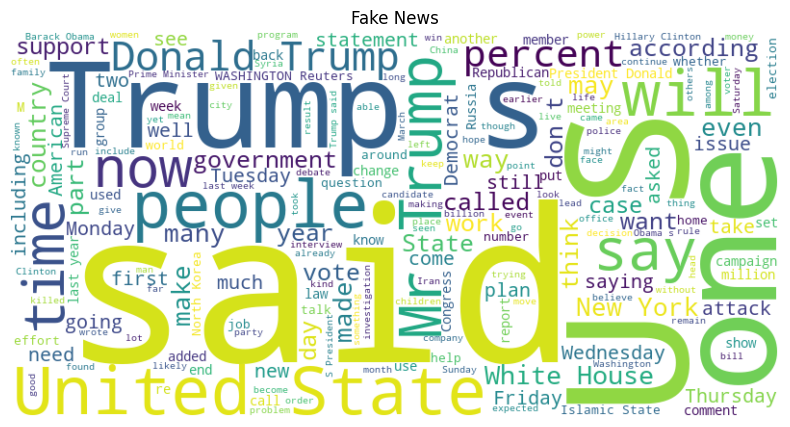

In [17]:
plot_wordcloud(fake_text, 'Fake News')
plt.show()

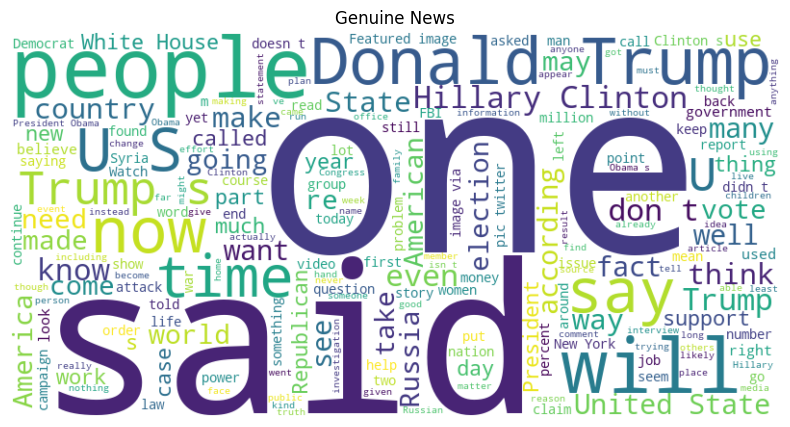

In [18]:
plot_wordcloud(real_text, 'Genuine News')
plt.show()

## Step 5: Text preprocessing

In [19]:
text_column = 'text'
lable_column = 'label'

In [20]:
stopword = set(stopwords.words('english'))
stopwords

<WordListCorpusReader in 'C:\\Users\\SHAHRIAR\\AppData\\Roaming\\nltk_data\\corpora\\stopwords'>

In [21]:
stopwords.fileids()

['arabic',
 'azerbaijani',
 'basque',
 'bengali',
 'catalan',
 'chinese',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hebrew',
 'hinglish',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

In [22]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
def preprocess_text(text):
    # Remove punctuation
    remove_punc = [char for char in text if char not in string.punctuation]
    clean_words = ''.join(remove_punc) # char joining
    
    # Remove stopwords
    text = ([word for word in clean_words.split() if word.lower() not in stopword]) # stopword = stopwords.words('english')
    return text

In [24]:
data[text_column] = data[text_column].apply(preprocess_text)

In [25]:
data[text_column]

0        [comment, expected, Barack, Obama, Members, FY...
1                          [post, votes, Hillary, already]
2        [demonstrators, gathered, last, night, exercis...
3        [dozen, politically, active, pastors, came, pr...
4        [RS28, Sarmat, missile, dubbed, Satan, 2, repl...
                               ...                        
72129    [WASHINGTON, Reuters, Hackers, believed, worki...
72130    [know, fantasyland, Republicans, never, questi...
72131    [Migrants, Refuse, Leave, Train, Refugee, Camp...
72132    [MEXICO, CITY, Reuters, Donald, Trump’s, comba...
72133    [Goldman, Sachs, Endorses, Hillary, Clinton, P...
Name: text, Length: 72134, dtype: object

## Step 6: Lemmatization

In [26]:
# Scaling words
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in text])
    return lemmatized_text

data[text_column] = data[text_column].apply(lemmatize_text)

In [27]:
data[text_column]

0        comment expected Barack Obama Members FYF911 F...
1                                post vote Hillary already
2        demonstrator gathered last night exercising co...
3        dozen politically active pastor came private d...
4        RS28 Sarmat missile dubbed Satan 2 replace SS1...
                               ...                        
72129    WASHINGTON Reuters Hackers believed working Ru...
72130    know fantasyland Republicans never questioned ...
72131    Migrants Refuse Leave Train Refugee Camp Hunga...
72132    MEXICO CITY Reuters Donald Trump’s combative s...
72133    Goldman Sachs Endorses Hillary Clinton Preside...
Name: text, Length: 72134, dtype: object

## Step 7: TF-IDF Vectorization

In [28]:
vectorizer = TfidfVectorizer()

x = vectorizer.fit_transform(data[text_column])
y = data[lable_column]

## Step 8: Split dataset into training and testing sets

In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(x, lables, test_size=0.30, random_state=42)

## Step 9: Evaluate Naive Bayes models

In [30]:
def evaluate_model(model, xtest, ytest):
    y_pred = model.predict(xtest)
    accuracy = accuracy_score(ytest, y_pred)
    cm = confusion_matrix(ytest, y_pred)
    prob = model.predict_proba(xtest)[:, 1]
    roc_auc = roc_auc_score(ytest, prob)
    fpr, tpr, thresholds = roc_curve(ytest, prob)
    precision, recall, _ = precision_recall_curve(ytest, prob)
    pr_auc = auc(recall, precision)

    return {
        'Accuracy': accuracy,
        'Confusion Matrix': cm 
    }

## Step 10: Build Naive Bayes models

### Multinomial Naive Bayes

In [31]:
mnb_model = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
mnb_model.fit(xtrain, ytrain)

MultinomialNB()

In [32]:
nb_results = evaluate_model(mnb_model, xtest, ytest)
nb_results

{'Accuracy': 0.8766692851531814,
 'Confusion Matrix': array([[9713,  900],
        [1769, 9259]], dtype=int64)}

### Evaluate Manually

In [33]:
cm = confusion_matrix(ytest, mnb_model.predict(xtest))
cm

array([[9713,  900],
       [1769, 9259]], dtype=int64)

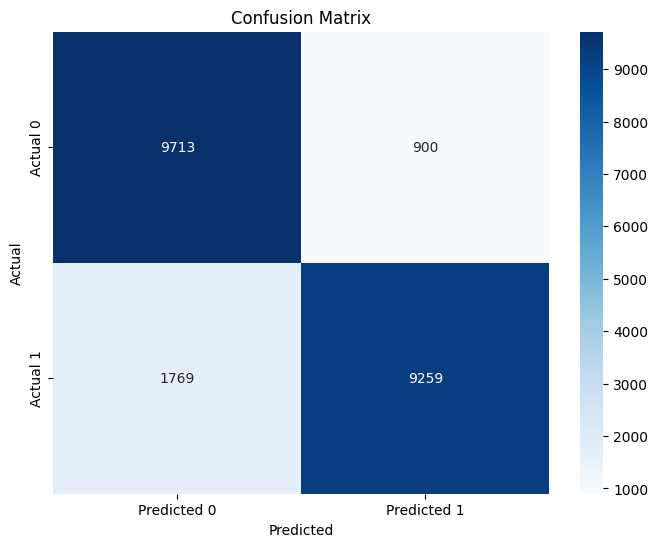

In [34]:
# Create heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [35]:
print(classification_report(ytest, mnb_model.predict(xtest)))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88     10613
           1       0.91      0.84      0.87     11028

    accuracy                           0.88     21641
   macro avg       0.88      0.88      0.88     21641
weighted avg       0.88      0.88      0.88     21641



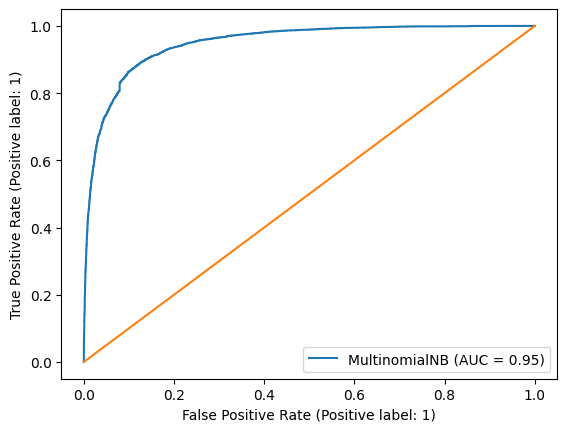

In [36]:
plot_roc_curve = RocCurveDisplay.from_estimator(mnb_model, xtest, ytest)
plt.plot([0,1], [0,1])

plot_roc_curve

## Bernoulli Naive Bayes

In [37]:
bnb_model = BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)
bnb_model.fit(xtrain, ytrain)

BernoulliNB()

In [38]:
bnb_results = evaluate_model(bnb_model, xtest, ytest)
bnb_results

{'Accuracy': 0.8547664156000185,
 'Confusion Matrix': array([[8575, 2038],
        [1105, 9923]], dtype=int64)}

In [39]:
cm_bnb = confusion_matrix(ytest, bnb_model.predict(xtest))
cm_bnb

array([[8575, 2038],
       [1105, 9923]], dtype=int64)

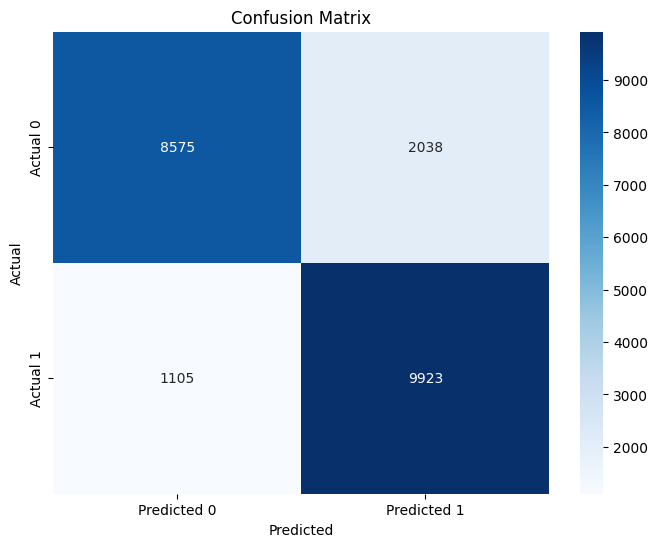

In [40]:
# Create heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bnb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [41]:
print(classification_report(ytest, bnb_model.predict(xtest)))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85     10613
           1       0.83      0.90      0.86     11028

    accuracy                           0.85     21641
   macro avg       0.86      0.85      0.85     21641
weighted avg       0.86      0.85      0.85     21641



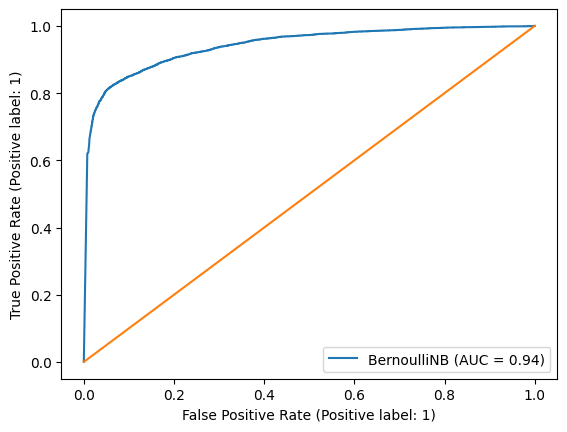

In [42]:
plot_roc_curve = RocCurveDisplay.from_estimator(bnb_model, xtest, ytest)
plt.plot([0,1], [0,1])

## Step 11: Apply Logistic Regression

In [43]:
lr_model = LogisticRegression(max_iter=1000)

In [44]:
lr_model.fit(xtrain, ytrain)

LogisticRegression(max_iter=1000)

## Step 12: Evaluate Logistric Regression Model

In [45]:
lr_results = evaluate_model(lr_model, xtest, ytest)

In [46]:
lr_results

{'Accuracy': 0.9511575250681576,
 'Confusion Matrix': array([[ 9974,   639],
        [  418, 10610]], dtype=int64)}

In [47]:
cm_lr = confusion_matrix(ytest, lr_model.predict(xtest))
cm_lr

array([[ 9974,   639],
       [  418, 10610]], dtype=int64)

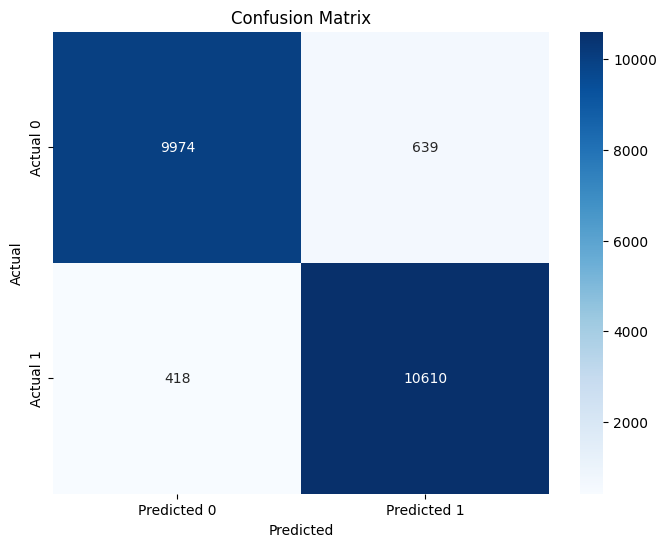

In [48]:
# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

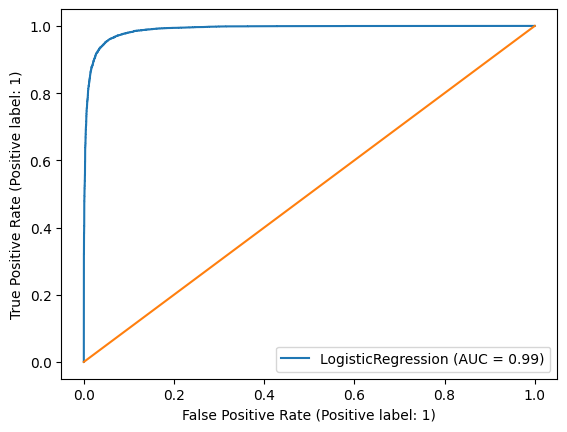

In [49]:
plot_roc_curve = RocCurveDisplay.from_estimator(lr_model, xtest, ytest)
plt.plot([0,1], [0,1])

## Step 13: Visualize performance with Histogram

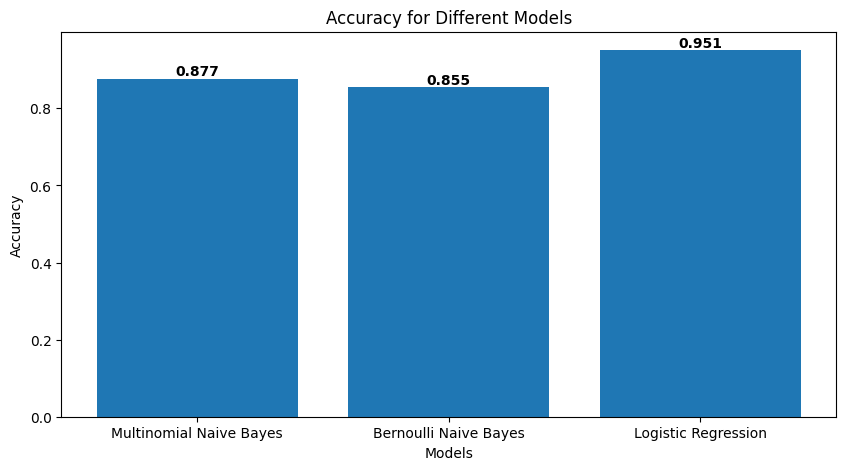

In [50]:
def plot_histogram(metric_values, model_names, metric_name):
    fig, ax = plt.subplots(figsize=(10, 5))
    bars = plt.bar(model_names, metric_values)
    plt.xlabel('Models')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} for Different Models')

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 3), ha='center', va='bottom', color='black', fontweight='bold')

    plt.show()

accuracy_values = [nb_results['Accuracy'], bnb_results['Accuracy'], lr_results['Accuracy']]
model_names = ['Multinomial Naive Bayes', 'Bernoulli Naive Bayes', 'Logistic Regression']

plot_histogram(accuracy_values, model_names, 'Accuracy')

## Step 14: Input randor text and make prediction

In [52]:
models = [mnb_model, bnb_model, lr_model]

In [61]:
random_text = input()

preprocessed_text = preprocess_text(random_text) # remove punctuation
lemmatized_text = lemmatize_text(preprocessed_text) # text scaling
text_vector = vectorizer.transform([lemmatized_text])

In [62]:
preprocessed_text

['dozen',
 'politically',
 'active',
 'pastor',
 'came',
 'private',
 'dinner',
 'Friday',
 'night',
 'hear',
 'conversion',
 'story',
 'unique',
 'context',
 'presidential',
 'politics',
 'Louisiana',
 'Gov',
 'Bobby',
 'Jindal',
 'traveled',
 'Hinduism',
 'Protestant',
 'Christianity',
 'ultimately',
 'became',
 'call',
 '“evangelical',
 'Catholic”',
 'two',
 'hour',
 'Jindal',
 '42',
 'recalled',
 'talking',
 'girl',
 'high',
 'school',
 'wanted',
 '“save',
 'soul”',
 'reading',
 'Bible',
 'closet',
 'parent',
 'would',
 'see',
 'feeling',
 'stir',
 'watching',
 'movie',
 'senior',
 'year',
 'depicted',
 'Jesus',
 'cross',
 '“I',
 'struck',
 'struck',
 'hard”',
 'Jindal',
 'told',
 'pastor',
 '“This',
 'Son',
 'God',
 'died',
 'sins”',
 'Jindal’s',
 'session',
 'Christian',
 'clergy',
 'lead',
 'congregation',
 'early',
 'presidential',
 'battleground',
 'state',
 'Iowa',
 'South',
 'Carolina',
 'part',
 'behindthescenes',
 'effort',
 'Louisiana',
 'governor',
 'find',
 'political',

In [63]:
lemmatized_text

'dozen politically active pastor came private dinner Friday night hear conversion story unique context presidential politics Louisiana Gov Bobby Jindal traveled Hinduism Protestant Christianity ultimately became call “evangelical Catholic” two hour Jindal 42 recalled talking girl high school wanted “save soul” reading Bible closet parent would see feeling stir watching movie senior year depicted Jesus cross “I struck struck hard” Jindal told pastor “This Son God died sins” Jindal’s session Christian clergy lead congregation early presidential battleground state Iowa South Carolina part behindthescenes effort Louisiana governor find political base could help propel top tier Republican candidate seeking run White House 2016 Known GOP circle mostly mastery policy issue health care Jindal Rhodes Scholar graduate Ivy League’s Brown University obvious pool activist supporter help drive excitement outside home state harnessing religious experience way begun appeal part GOP’s influential core 

In [64]:
text_vector

<1x363127 sparse matrix of type '<class 'numpy.float64'>'
	with 521 stored elements in Compressed Sparse Row format>

In [65]:
text_vector.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [66]:
for model in models:
    prediction = model.predict(text_vector)
    print(f"Model: {type(model).__name__}")
    print("Prediction: ", prediction)
    print("\n")

Model: MultinomialNB
Prediction:  [0]


Model: BernoulliNB
Prediction:  [0]


Model: LogisticRegression
Prediction:  [0]




## Step 16: Save good ML model for deployment

In [67]:
import pickle

# Define a file path where you want to save the model
model_file_path = 'logistic_regression_model.pkl'

# Save the model to the file
with open(model_file_path, 'wb') as model_file:
    pickle.dump(lr_model, model_file)

### Load the save model

In [68]:
with open(model_file_path, 'rb') as model_file:
    loaded_LR = pickle.load(model_file)

In [69]:
loaded_LR.predict(xtest)

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [70]:
loaded_LR.score(xtest, ytest)

0.9511575250681576

In [71]:
loaded_LR.predict(text_vector)

array([0], dtype=int64)